In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np


import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import warnings
warnings.filterwarnings('ignore')


from numpy.random import seed
seed(42)

from keras import callbacks

import os
import tqdm
from os import walk
import cv2

import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix, plot_roc_curve, \
make_scorer, recall_score, precision_score, f1_score
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.callbacks import ReduceLROnPlateau

from numpy.random import seed
seed(42)

In [ ]:
labels = ['CANCEROUS', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_training_data('/content/drive/MyDrive/Breast_Histopathology_dataset/Dataset/train')
test = get_training_data('/content/drive/MyDrive/Breast_Histopathology_dataset/Dataset/test')
val = get_training_data('/content/drive/MyDrive/Breast_Histopathology_dataset/Dataset/val')

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



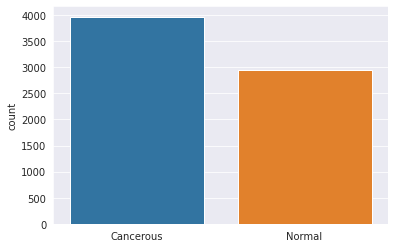

In [ ]:
get_count = []
for i in train:
    if(i[1] == 0):
        get_count.append("Cancerous")
    else:
        get_count.append("Normal")
sns.set_style('darkgrid')
sns.countplot(get_count) 

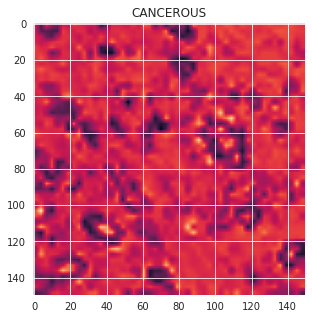

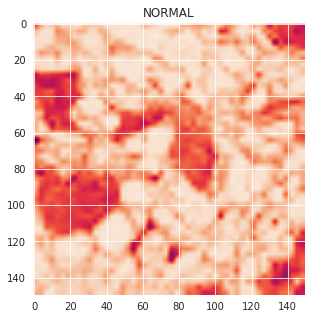

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0])
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]]);

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
#Normalize the data
x_train = np.array(x_train) / 253
x_val = np.array(x_val) / 253
x_test = np.array(x_test) / 253

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(6911, 150, 150)
(979, 150, 150)
(107, 150, 150)


In [ ]:
#reshaping data for logistic regression
train_img = x_train.reshape(x_train.shape[0], -1)
test_img = x_test.reshape(x_test.shape[0], -1)
val_img = x_val.reshape(x_val.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)


(6911, 22500)
(979, 22500)
(107, 22500)


In [ ]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(6911, 150, 150, 1)
(979, 150, 150, 1)
(107, 150, 150, 1)


In [ ]:
# Showing shape of images

m_train = x_train.shape[0]
num_px = x_train.shape[1]
m_test = x_test.shape[0]
m_val = x_val.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(x_train.shape))
print ("train_labels shape: " + str(y_train.shape))
print ("test_images shape: " + str(x_test.shape))
print ("test_labels shape: " + str(y_test.shape))
print ("val_images shape: " + str(x_val.shape))
print ("val_labels shape: " + str(y_val.shape))

Number of training samples: 6911
Number of testing samples: 979
Number of validation samples: 107
train_images shape: (6911, 150, 150, 1)
train_labels shape: (6911,)
test_images shape: (979, 150, 150, 1)
test_labels shape: (979,)
val_images shape: (107, 150, 150, 1)
val_labels shape: (107,)


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
# Reshaping data to run models

# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(6911, 150, 150, 1)
(6911,)
(107, 150, 150, 1)
(107,)
(979, 150, 150, 1)
(979,)


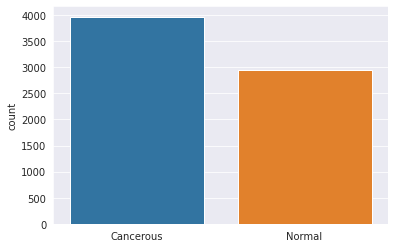

In [ ]:
# Showing the difference between Non Pneumonia Images and Pneumonia Images

l = []
for i in train:
    if(i[1] == 0):
        l.append("Cancerous")
    else:
        l.append("Normal")
sns.set_style("darkgrid")
sns.countplot(l)
plt.show()



0.6067415730337079
0.5103626943005182


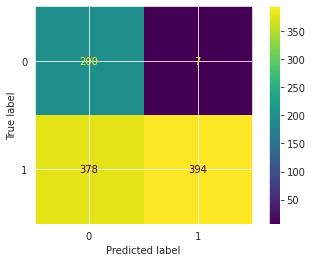

In [ ]:
# Baseline Logistic Regression

lr = LogisticRegression(random_state = 42)

lr.fit(train_img, y_train)

print(lr.score(test_img, y_test))

y_pred = lr.predict(test_img)

print(recall_score(y_test, y_pred))

plot_confusion_matrix(lr, test_img, y_test)
plt.show()

In [ ]:
# Baseline Model

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(22500,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='sgd',
             loss = 'binary_crossentropy',
             metrics =  ['accuracy', tf.keras.metrics.Recall()])

histoire = model.fit(train_img,
                    y_train,
                    epochs = 50,
                    batch_size = 32,
                    validation_data=(val_img,y_val))

print(f"\nTraining Score: {model.evaluate(train_img, y_train)}")
print(f"\nTest Score: {model.evaluate(test_img, y_test)}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                450020    
                                                                 
 dense_5 (Dense)             (None, 7)                 147       
                                                                 
 dense_6 (Dense)             (None, 5)                 40        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 450,213
Trainable params: 450,213
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
216/216 [==============================] - 3s 10ms/step - loss: 0.6914 - accuracy: 0.5771 - recall_1: 0.4011 - val_loss: 0.6906 - val_accuracy: 0.4019 - val_recall_1: 0.

In [ ]:
#Obviously a lot of overfitting happening here. 


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                450020    
                                                                 
 dense_5 (Dense)             (None, 7)                 147       
                                                                 
 dense_6 (Dense)             (None, 5)                 40        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 450,213
Trainable params: 450,213
Non-trainable params: 0
_________________________________________________________________


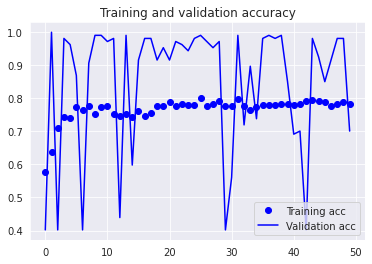

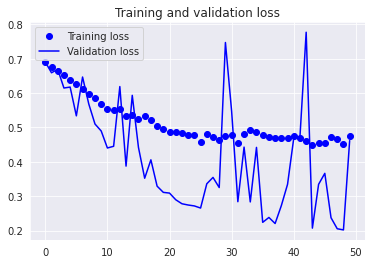

In [ ]:
# Plots

acc = histoire.history['accuracy']
val_acc = histoire.history['val_accuracy']
loss = histoire.history['loss']
val_loss = histoire.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
# Conv2d and MaxPool2D Model

model = models.Sequential()
model.add(layers.Conv2D(32 , (3,3), strides = 1, activation='relu', input_shape=(150,150,1)))
model.add(layers.MaxPool2D((2,2), strides = 2))


model.add(layers.Conv2D(64, (3,3), strides = 1, activation='relu'))
model.add(layers.MaxPool2D((2,2), strides = 2))


model.add(layers.Conv2D(64, (3,3), strides = 1, activation='relu'))
model.add(layers.MaxPool2D((2,2), strides = 2))


model.add(layers.Conv2D(128, (3,3), strides = 1, activation='relu'))
model.add(layers.MaxPool2D((2,2), strides = 2))

model.add(layers.Conv2D(256, (3,3), strides = 1, activation='relu'))
model.add(layers.MaxPool2D((2,2), strides = 2))

model.add(layers.Flatten())

model.add(layers.Dense(units=128, activation='relu'))


model.add(layers.Dense(units=1, activation='sigmoid'))

model.summary()

model.compile(optimizer='sgd',
             loss = 'binary_crossentropy',
             metrics =  ['accuracy', tf.keras.metrics.Recall()])

histoire = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    steps_per_epoch= 80,
                    batch_size = 32,
                    validation_data=(x_val,y_val))

print(f"\nTraining Score: {model.evaluate(x_train, y_train)}")
print(f"\nTest Score: {model.evaluate(x_test, y_test)}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)      

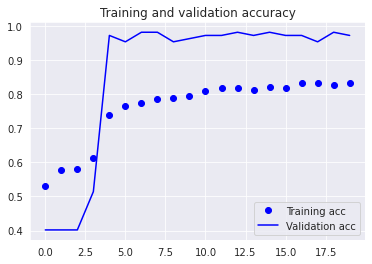

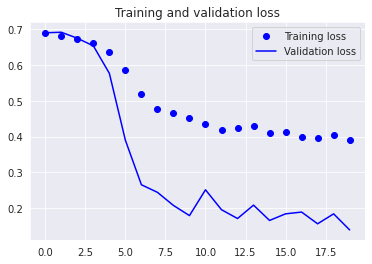

In [ ]:
# Plots

acc = histoire.history['accuracy']
val_acc = histoire.history['val_accuracy']
loss = histoire.history['loss']
val_loss = histoire.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32 , (3,3), strides = 1, padding = 'same', activation='relu', input_shape=(150,150,1)))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2,2), strides = 2, padding = 'same'))


model.add(layers.Conv2D(64, (3,3), strides = 1, padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2,2), strides = 2, padding = 'same'))


model.add(layers.Conv2D(64, (3,3), strides = 1, padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2,2), strides = 2, padding = 'same'))


model.add(layers.Conv2D(128, (3,3), strides = 1, padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(layers.Conv2D(256, (3,3), strides = 1, padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(layers.Flatten())

model.add(layers.Dense(units=128, activation='relu'))


model.add(layers.Dense(units=1, activation='sigmoid'))

model.summary()

model.compile(optimizer= "rmsprop",
             loss = 'binary_crossentropy',
             metrics =  ['accuracy', tf.keras.metrics.Recall()])

histoire = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    steps_per_epoch = 80,
                    batch_size = 32,
                    validation_data=(x_val,y_val))

print(f"\nTraining Score: {model.evaluate(x_train, y_train)}")
print(f"\nTest Score: {model.evaluate(x_test, y_test)}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       256       
 hNormalization)                                                 
                                                      

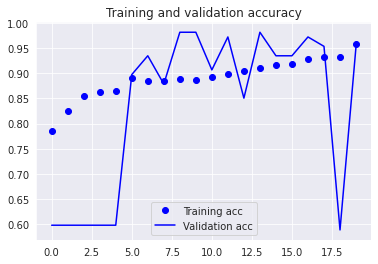

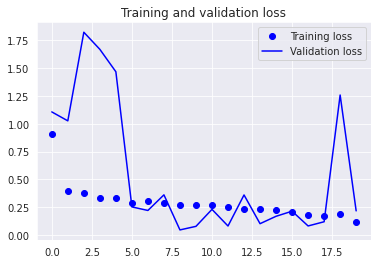

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plots

acc = histoire.history['accuracy']
val_acc = histoire.history['val_accuracy']
loss = histoire.history['loss']
val_loss = histoire.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Breast_Histopathology_dataset/images', bbox_inches = "tight")

In [ ]:
#Let add a Learning rate reducer to account for overfitting


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32 , (3,3), strides = 1, padding = 'same',  
                        activation='relu',  
                        input_shape=(150,150,1)))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2,2), strides = 2, padding = 'same'))


model.add(layers.Conv2D(64, (3,3), strides = 1, padding = 'same',  
                        activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2,2), strides = 2, padding = 'same'))


model.add(layers.Conv2D(64, (3,3), strides = 1, padding = 'same',  
                        activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2,2), strides = 2, padding = 'same'))


model.add(layers.Conv2D(128, (3,3), strides = 1, padding = 'same',  
                        activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(layers.Conv2D(256, (3,3), strides = 1, padding = 'same', 
                        activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(layers.Flatten())

model.add(layers.Dense(units=128, activation='relu'))
model.add(Dropout(0.2))


model.add(layers.Dense(units=1, activation='sigmoid'))

model.summary()

model.compile(optimizer= "rmsprop",
             loss = 'binary_crossentropy',
             metrics =  ['accuracy', tf.keras.metrics.Recall()])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, 
                                            verbose=1,factor=0.3, min_lr=0.000001)

histoire = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,
                               epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,
                               callbacks = [learning_rate_reduction])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 150, 150, 32)      320       
                                                                 
 batch_normalization_5 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 75, 75, 64)      

In [ ]:
#test

In [ ]:
print(f"\nTraining Score: {model.evaluate(x_train, y_train)}")
print(f"\nTest Score: {model.evaluate(x_test, y_test)}")

NameError: ignored

In [ ]:
# Plots

acc = histoire.history['accuracy']
val_acc = histoire.history['val_accuracy']
loss = histoire.history['loss']
val_loss = histoire.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Breast_Histopathology_dataset/images', bbox_inches = "tight")

In [ ]:
#early stopping callback instead of learning rate reduction 

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32 , (3,3), strides = 1, padding = 'same',  
                        activation='relu',  
                        input_shape=(150,150,1)))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2,2), strides = 2, padding = 'same'))


model.add(layers.Conv2D(64, (3,3), strides = 1, padding = 'same',  
                        activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2,2), strides = 2, padding = 'same'))


model.add(layers.Conv2D(64, (3,3), strides = 1, padding = 'same',  
                        activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2,2), strides = 2, padding = 'same'))


model.add(layers.Conv2D(128, (3,3), strides = 1, padding = 'same',  
                        activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(layers.Conv2D(256, (3,3), strides = 1, padding = 'same', 
                        activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(layers.Flatten())

model.add(layers.Dense(units=128, activation='relu'))
model.add(Dropout(0.2))


model.add(layers.Dense(units=1, activation='sigmoid'))

model.summary()

model.compile(optimizer= "rmsprop",
             loss = 'binary_crossentropy',
             metrics =  ['accuracy', tf.keras.metrics.Recall()])

# learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, 
#                                             verbose=1,factor=0.3, min_lr=0.000001)

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

histoire = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,
                               epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,
                               callbacks = [earlystopping])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)      